# Laboratorio 8

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix 

%matplotlib inline

In [134]:
digits_X, digits_y = datasets.load_digits(return_X_y=True, as_frame=True)
digits = pd.concat([digits_X, digits_y], axis=1)
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Ejercicio 1

(1 pto.)

Utilizando todos los datos, ajusta un modelo de regresión logística a los datos de dígitos. No agregues intercepto y define un máximo de iteraciones de 400.

Obtén el _score_ y explica el tan buen resultado.

In [146]:
logistic = LogisticRegression(fit_intercept =False,max_iter=400)
logistic.fit(digits_X, digits_y )
print(f"El score del modelo de regresión logística es {logistic.score(digits_X, digits_y)}")

El score del modelo de regresión logística es 1.0


__Respuesta:__  En lo siguiente podemos comprobar que no es dependiente de la cantidad de datos ni tampoco es algo que siempre ocurra, como vemos en el segundo contraejemplo, entonces nos queda que siempre le estemos entregando al score una comparación de algo con si mismo.

In [156]:
#probar para valpres de a menores a 1700 app
a=4
ejercicio1_df_X = digits_X[:a]
ejercicio1_df_y = digits_y[:a]
logistic_2 = LogisticRegression(fit_intercept =False,max_iter=400)
logistic_2.fit(ejercicio1_df_X , ejercicio1_df_y)
print(f"El score del modelo de regresión logística es {logistic_2.score(ejercicio1_df_X , ejercicio1_df_y)}")

El score del modelo de regresión logística es 1.0


In [158]:
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(fit_intercept =False,max_iter=400).fit(X, y)
clf.score(X,y)

0.9666666666666667

## Ejercicio 2

(1 pto.)

Utilizando todos los datos, ¿Cuál es la mejor elección del parámetro $k$ al ajustar un modelo kNN a los datos de dígitos? Utiliza valores $k=2, ..., 10$.

In [29]:
for k in range(2,11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(digits_X, digits_y)
    score = neigh.score(digits_X, digits_y)
    print(f"El score del modelo de kNN con k={k} es {score}")

El score del modelo de kNN con k=2 es 0.9910962715637173
El score del modelo de kNN con k=3 es 0.993322203672788
El score del modelo de kNN con k=4 es 0.9922092376182526
El score del modelo de kNN con k=5 es 0.9905397885364496
El score del modelo de kNN con k=6 es 0.989983305509182
El score del modelo de kNN con k=7 es 0.9905397885364496
El score del modelo de kNN con k=8 es 0.9894268224819143
El score del modelo de kNN con k=9 es 0.9888703394546466
El score del modelo de kNN con k=10 es 0.9855314412910406


__Respuesta:__ con k=3

## Ejercicio 3

(1 pto.)

Grafica la matriz de confusión normalizada por predicción de ambos modelos (regresión logística y kNN con la mejor elección de $k$).

¿Qué conclusión puedes sacar?

Hint: Revisa el argumento `normalize` de la matriz de confusión.

En la pregunta anterior nos dimos cuenta de que con `k=3` es un mejor ajuste. Veamos como son la matrices

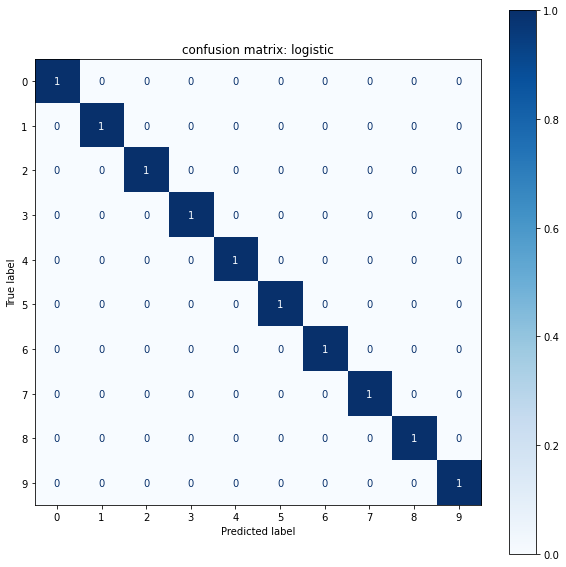

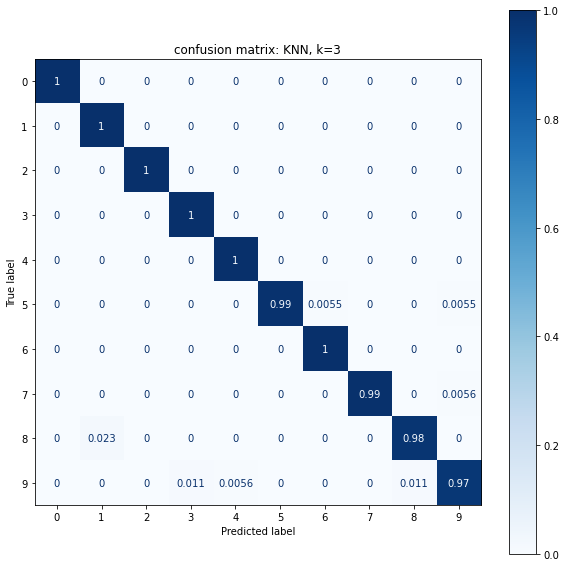

In [126]:
neigh = KNeighborsClassifier(n_neighbors=3);
neigh.fit(digits_X, digits_y);

fig, ax = plt.subplots(figsize=(10, 10))

ejercicio3_logistic = plot_confusion_matrix(logistic,digits_X, digits_y,
                        cmap=plt.cm.Blues,
                        normalize=normalize,ax=ax)

ejercicio3_logistic.ax_.set_title("confusion matrix: logistic")


np.set_printoptions(precision=2)
fig, ax = plt.subplots(figsize=(10, 10))


ejercicio3_knn = plot_confusion_matrix(neigh,digits_X, digits_y,
                        cmap=plt.cm.Blues,
                        normalize=normalize,ax=ax) 
ejercicio3_knn.ax_.set_title("confusion matrix: KNN, k=3");

__Respuesta:__

Como vimos anteriormente no podemos decir mucho más del primer ajuste (logistico) ya que su precision es perfecta. Por otra parte, en el segundo caso, KNN con k=3, notamos a medida que nos acercamos diagonalmente hacia abajo, es decir, hacia el 9, hay una baja en la precisión, incluso podemos darnos cuenta de que hasta una vecindad mediana del (3,3) hay una precisión perfecta. Esta baja alcanza su peak en exactamente en la predicción (9,9).

## Ejercicio 4

(1 pto.)

Escoge algún registro donde kNN se haya equivocado, _plotea_ la imagen y comenta las razones por las que el algoritmo se pudo haber equivocado.

In [120]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(digits_X, digits_y);

El valor real del registro seleccionado es

In [111]:
i = 9
display(digits_X.iloc[[i], :])
print("\n La prediccion por KNN k=3  es: \n")
print(neigh.predict(digits_X.iloc[[i], :]))
neigh.predict_proba(digits_X.iloc[[i], :])

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0



 La prediccion por KNN k=3  es: 

[9]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

A continuación la imagen

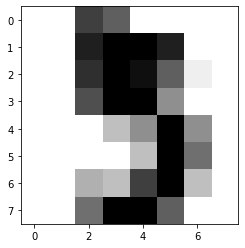

In [99]:
plt.imshow(digits_X.loc[[i], :].to_numpy().reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest');

__Respuesta:__ #
Notemos que en la resolucion dada, el 5 y el 9 tienen una curvatura similar, lo que conlleva a posiciones muy similares y como KNN asocia valores por vecindades, esperariamos que hubiera algún problema con esto.

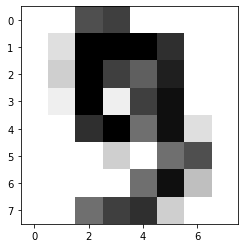

In [119]:
i = 9
plt.imshow(digits_X.loc[[9], :].to_numpy().reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest');